In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
print(df.head())
cols = []
for i in df.columns :
     cols.append(i)
df = df.dropna(subset=cols)
mapping = {"Yes": 1, "No": 0}
mapping1 = {"Male": 1, "Female": 0}
mapping2 = {"Yes": 1, "No" : 0, "No phone service" : 2}
mapping3 = {"DSL": 1, "No" : 0, "Fiber optic" : 2}
mapping4 = {"Yes": 1, "No" : 0, "No internet" : 2}
mapping5 = {"Month-to-month": 1, "One year" : 0, "Two year" : 2}
mapping6 = {"Electronic check": 1, "Mailed Check" : 0, "Bank transfer (automatic)" : 2, "Credit card (automatic)":3}

df['Churnint'] = df['Churn'].map(mapping).astype(float)
df['Dependentsint'] = df['Dependents'].map(mapping).astype(float)
df['Partnerint'] = df['Partner'].map(mapping).astype(float)
df['PhoneServiceint'] = df['PhoneService'].map(mapping).astype(float)
df['PaperlessBillingint'] = df['PaperlessBilling'].map(mapping).astype(float)
df['genderint'] = df['gender'].map(mapping1).astype(float)
df['MultipleLinesint'] = df['MultipleLines'].map(mapping2).astype(float)
df['InternetServiceint'] = df['InternetService'].map(mapping3).astype(float)
df['OnlineSecurityint'] = df['OnlineSecurity'].map(mapping4).astype(float)
df['OnlineBackupint'] = df['OnlineBackup'].map(mapping4).astype(float)
df['DeviceProtectionint'] = df['DeviceProtection'].map(mapping4).astype(float)
df['TechSupportint'] = df['TechSupport'].map(mapping4).astype(float)
df['StreamingTVint'] = df['StreamingTV'].map(mapping4).astype(float)
df['StreamingMoviesint'] = df['StreamingMovies'].map(mapping4).astype(float)
df['Contractint'] = df['Contract'].map(mapping5).astype(float)
df['PaymentMethodint'] = df['PaymentMethod'].map(mapping6).astype(float)
binarycols = ['Dependentsint','Partnerint','PhoneServiceint','PaperlessBillingint','genderint']
nonbinarycols = ['MultipleLinesint','InternetServiceint','OnlineSecurityint','OnlineBackupint','DeviceProtectionint','TechSupportint','StreamingTVint','StreamingMoviesint','Contractint','PaymentMethodint']

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'],errors = 'coerce')
df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'],errors = 'coerce')

float_columns = ['TotalCharges', 'MonthlyCharges','tenure','SeniorCitizen']
df[float_columns] = df[float_columns].astype(float)
x_cols = binarycols + nonbinarycols + float_columns
for i in df.columns :
     cols.append(i)
df = df.dropna(subset=cols)

print(x_cols)






   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:

X = df[['TotalCharges', 'MonthlyCharges']]
y = df['Churnint']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7588805166846071
Confusion Matrix:
[[550  87]
 [137 155]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X1 = df[['TotalCharges', 'MonthlyCharges','tenure','SeniorCitizen',]]
y1 = df['Churnint']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.005, random_state=42)
model1 = LogisticRegression()
model1.fit(X1_train, y1_train)
y_pred1 = model1.predict(X1_test)
accuracy1 = accuracy_score(y1_test, y_pred1)
conf_matrix1 = confusion_matrix(y1_test, y_pred1)
print("Accuracy:", accuracy1)
print("Confusion Matrix:")
print(conf_matrix1)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X1_train, y1_train)
y_pred2 = rf_classifier.predict(X1_test)
accuracy2 = accuracy_score(y1_test, y_pred2)
print("Accuracy:", accuracy2)
print("Classification Report:")
print(classification_report(y1_test, y_pred2))

Accuracy: 0.7916666666666666
Confusion Matrix:
[[15  2]
 [ 3  4]]
Accuracy: 0.7916666666666666
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85        17
         1.0       0.62      0.71      0.67         7

    accuracy                           0.79        24
   macro avg       0.75      0.77      0.76        24
weighted avg       0.80      0.79      0.80        24



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

a = df[x_cols]
b = df['Churnint']
ts = float(input("enter test size here: "))
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size= ts, random_state=42)
model3 = LogisticRegression()
model3.fit(a_train, b_train)
b_pred = model3.predict(a_test)
accuracy3 = accuracy_score(b_test, b_pred)
conf_matrix3 = confusion_matrix(b_test, b_pred)
print("Accuracy:", accuracy3)
print("Confusion Matrix:")
print(conf_matrix3)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(a_train, b_train)
b_pred1 = rf_classifier.predict(a_test)
accuracy4 = accuracy_score(b_test, b_pred1)
print("Accuracy:", accuracy4)
print("Classification Report:")
print(classification_report(b_test, b_pred1))

enter test size here: 0.1
Accuracy: 0.8043010752688172
Confusion Matrix:
[[268  38]
 [ 53 106]]
Accuracy: 0.7784946236559139
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       306
         1.0       0.73      0.55      0.63       159

    accuracy                           0.78       465
   macro avg       0.76      0.72      0.74       465
weighted avg       0.77      0.78      0.77       465



In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



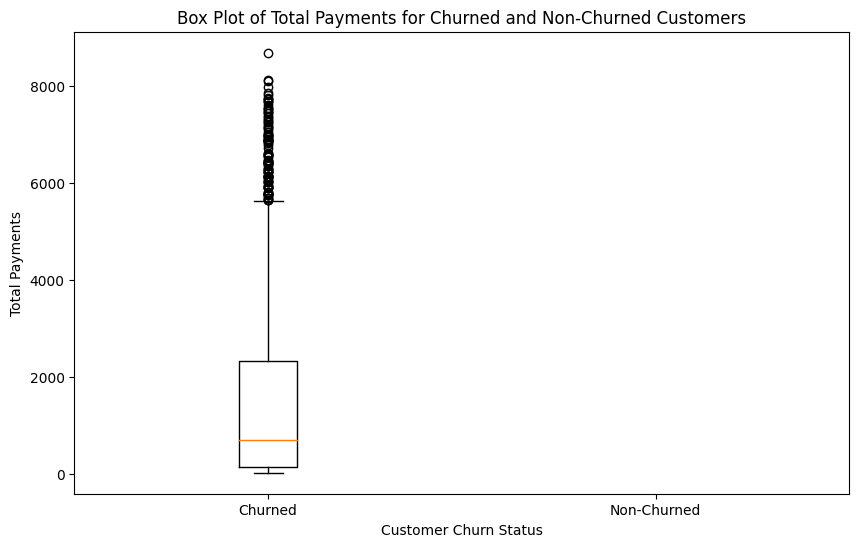

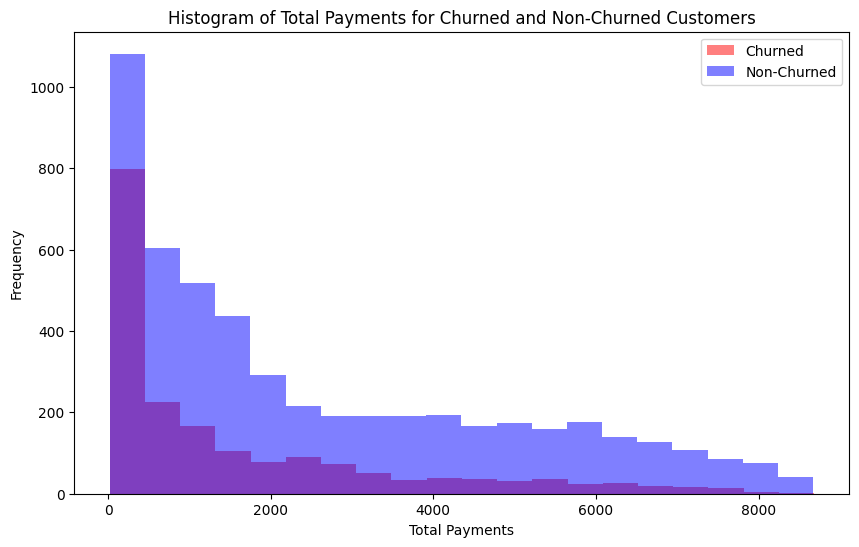

In [ ]:
churned_payments = df[df['Churn'] == 'Yes']['TotalCharges']
non_churned_payments = df[df['Churn'] == 'No']['TotalCharges']

# Plot boxplots for churned and non-churned payments
plt.figure(figsize=(10, 6))
plt.boxplot([churned_payments, non_churned_payments], labels=['Churned', 'Non-Churned'])
plt.title('Box Plot of Total Payments for Churned and Non-Churned Customers')
plt.xlabel('Customer Churn Status')
plt.ylabel('Total Payments')
plt.show()
plt.figure(figsize=(10, 6))
plt.hist(churned_payments, bins=20, alpha=0.5, label='Churned', color='red')
plt.hist(non_churned_payments, bins=20, alpha=0.5, label='Non-Churned', color='blue')
plt.title('Histogram of Total Payments for Churned and Non-Churned Customers')
plt.xlabel('Total Payments')
plt.ylabel('Frequency')
plt.legend()
plt.show()


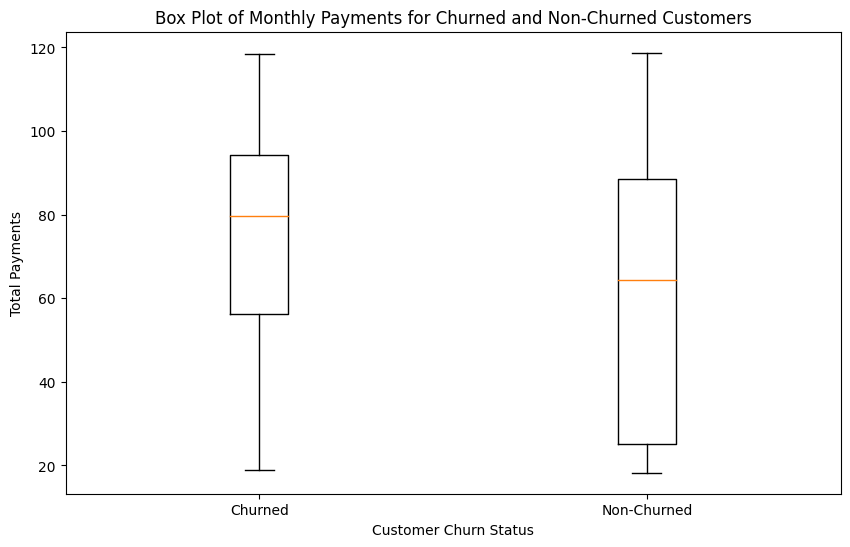

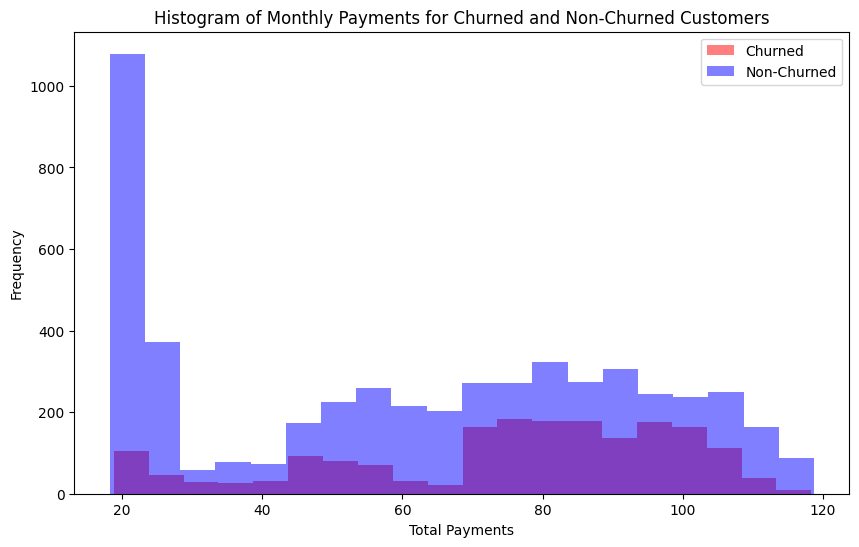

In [ ]:
churned_payments1 = df[df['Churn'] == 'Yes']['MonthlyCharges']
non_churned_payments1 = df[df['Churn'] == 'No']['MonthlyCharges']

# Plot boxplots for churned and non-churned payments
plt.figure(figsize=(10, 6))
plt.boxplot([churned_payments1, non_churned_payments1], labels=['Churned', 'Non-Churned'])
plt.title('Box Plot of Monthly Payments for Churned and Non-Churned Customers')
plt.xlabel('Customer Churn Status')
plt.ylabel('Total Payments')
plt.show()
plt.figure(figsize=(10, 6))
plt.hist(churned_payments1, bins=20, alpha=0.5, label='Churned', color='red')
plt.hist(non_churned_payments1, bins=20, alpha=0.5, label='Non-Churned', color='blue')
plt.title('Histogram of Monthly Payments for Churned and Non-Churned Customers')
plt.xlabel('Total Payments')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
churned_mean = churned_payments.mean()
churned_median = churned_payments.median()
churned_std = churned_payments.std()
churned_count = churned_payments.count()

# Calculate descriptive statistics for non-churned payments
non_churned_mean = non_churned_payments.mean()
non_churned_median = non_churned_payments.median()
non_churned_std = non_churned_payments.std()
non_churned_count = non_churned_payments.count()

# Print descriptive statistics for churned payments
print("Descriptive statistics for total churned payments:")
print("Mean:", churned_mean)
print("Median:", churned_median)
print("Standard Deviation:", churned_std)
print("Number of Entries:", churned_count)

# Print descriptive statistics for non-churned payments
print("\nDescriptive statistics for total non-churned payments:")
print("Mean:", non_churned_mean)
print("Median:", non_churned_median)
print("Standard Deviation:", non_churned_std)
print("Number of Entries:", non_churned_count)

churned_mean1 = churned_payments1.mean()
churned_median1 = churned_payments1.median()
churned_std1 = churned_payments1.std()
churned_count1 = churned_payments1.count()

# Calculate descriptive statistics for non-churned payments
non_churned_mean1 = non_churned_payments1.mean()
non_churned_median1 = non_churned_payments1.median()
non_churned_std1 = non_churned_payments1.std()
non_churned_count1 = non_churned_payments1.count()

# Print descriptive statistics for churned payments
print("Descriptive statistics for monthly churned payments:")
print("Mean:", churned_mean1)
print("Median:", churned_median1)
print("Standard Deviation:", churned_std1)
print("Number of Entries:", churned_count1)

# Print descriptive statistics for non-churned payments
print("\nDescriptive statistics for monthly non-churned payments:")
print("Mean:", non_churned_mean1)
print("Median:", non_churned_median1)
print("Standard Deviation:", non_churned_std1)
print("Number of Entries:", non_churned_count1)

Descriptive statistics for total churned payments:
Mean: 1531.7960941680042
Median: 703.55
Standard Deviation: 1890.822994464404
Number of Entries: 1869

Descriptive statistics for total non-churned payments:
Mean: 2555.344141003293
Median: 1683.6
Standard Deviation: 2329.4569835604343
Number of Entries: 5163
Descriptive statistics for monthly churned payments:
Mean: 74.44133226324237
Median: 79.65
Standard Deviation: 24.666053259397433
Number of Entries: 1869

Descriptive statistics for monthly non-churned payments:
Mean: 61.307408483439865
Median: 64.45
Standard Deviation: 31.094556906672572
Number of Entries: 5163


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [ ]:
print("nonchurned",non_churned_payments.head())
print("churned",churned_payments.head())
print(non_churned_payments.mean())
print(churned_payments.mean())

nonchurned 0      29.85
1    1889.50
3    1840.75
6    1949.40
7     301.90
Name: TotalCharges, dtype: float64
churned 2      108.15
4      151.65
5      820.50
8     3046.05
13    5036.30
Name: TotalCharges, dtype: float64
2555.344141003293
1531.7960941680042
